## WEEK 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
df=pd.read_csv('/content/dataset.csv',sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [6]:
df.date=pd.to_datetime(df.date)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


/tmp/ipython-input-6-704187392.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.date=pd.to_datetime(df.date)


In [7]:
df.isnull().sum()


,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2861.0,12.397064,1.0,8.0,14.0,16.0,22.0,6.084226
date,2861,2010-05-02 22:53:33.701502976,2000-01-10 00:00:00,2005-03-10 00:00:00,2010-06-04 00:00:00,2015-08-11 00:00:00,2021-04-07 00:00:00,NaN
NH4,2858.0,0.758734,0.0,0.08,0.22,0.5,39.427,2.486247
BSK5,2860.0,4.316182,0.0,2.16,3.8,5.8,50.9,2.973997
Suspended,2845.0,12.931905,0.0,6.0,10.0,15.0,595.0,16.543097
O2,2858.0,9.508902,0.0,7.0925,8.995,11.52,90.0,4.42826
NO3,2860.0,4.316846,0.0,1.39,2.8,5.5825,133.4,6.881188
NO2,2858.0,0.246128,0.0,0.03,0.059,0.12575,109.0,2.182777
SO4,2812.0,59.362313,0.0,27.0525,37.8,64.64,3573.4,96.582641
PO4,2833.0,0.418626,0.0,0.13,0.27,0.47,13.879,0.771326


In [9]:
df = df.sort_values(by=['id', 'date'])
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [10]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [12]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

# WEEK 2

In [13]:
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [15]:
df.isnull().sum()

,0
id,0
date,0
NH4,2
BSK5,0
Suspended,2
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [16]:
X = df[['id', 'year']]
y = df[pollutants]

In [17]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [18]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [34]:
# Models to compare
models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'KNN': MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5)),
    'XGBoost': MultiOutputRegressor(XGBRegressor(tree_method='hist', objective='reg:squarederror', verbosity=0))
}

mse_results = {}
r2_results = {}

In [35]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')

    mse_results[name] = mse
    r2_results[name] = r2

In [37]:
#Dataframe
mse_df = pd.DataFrame(mse_results, index=pollutants).T
r2_df = pd.DataFrame(r2_results, index=pollutants).T

<Figure size 1000x600 with 0 Axes>

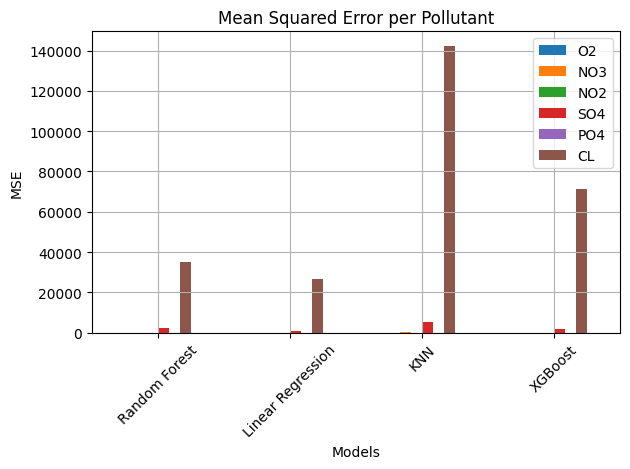

<Figure size 1000x600 with 0 Axes>

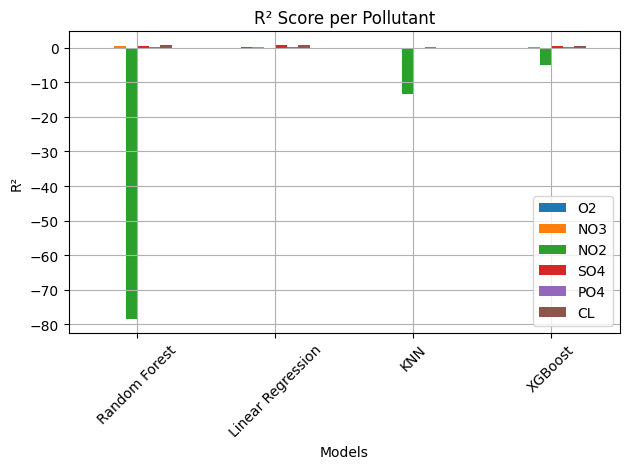

In [39]:
#Performance Plot
plt.figure(figsize=(10, 6))
mse_df.plot(kind='bar')
plt.title("Mean Squared Error per Pollutant")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
r2_df.plot(kind='bar')
plt.title("R² Score per Pollutant")
plt.ylabel("R²")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
mse_df['Average_MSE'] = mse_df.mean(axis=1)
print(mse_df[['Average_MSE']])


                    Average_MSE
Random Forest       6224.386227
Linear Regression   4574.408668
KNN                24641.403955
XGBoost            12159.765116


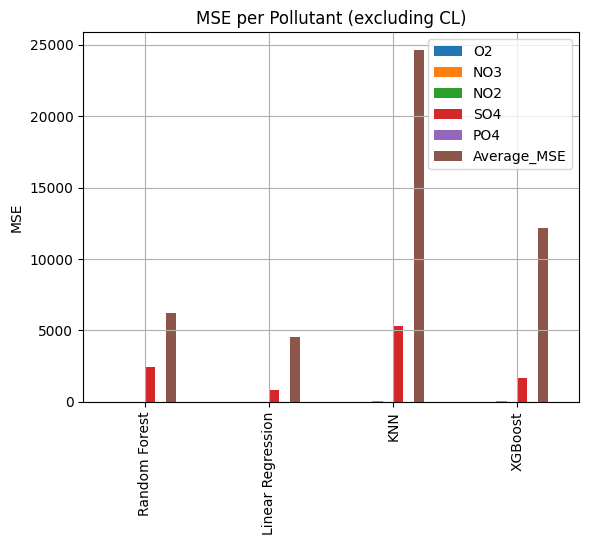

In [41]:
# Drop CL and replot
mse_df_no_cl = mse_df.drop(columns=['CL'])
mse_df_no_cl.plot(kind='bar')
plt.title("MSE per Pollutant (excluding CL)")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


Based on the all four model's performance we can conclude that XGBoost is Optimal Model which has less MSE and near zero r2 compared to other models


In [45]:
# Use XGBoost
model = models['XGBoost']

station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # Reorder to match

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

# Output prediction
print(f"\n Predicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")



 Predicted pollutant levels for station '22' in 2024:
  O2: 14.20
  NO3: 5.17
  NO2: 0.06
  SO4: 147.27
  PO4: 0.50
  CL: 90.96


In [46]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
